In [67]:
import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.version.VERSION)


2.7.0


In [68]:
new_model = tf.keras.models.load_model('models/mandelbrain-1638790351-good')


In [69]:
#new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [70]:
x = tf.random.uniform((200_000,), -2.0, 0.7, tf.float16)
y = tf.random.uniform((200_000,), -1.3, 1.3, tf.float16)
data = tf.stack([x, y], axis=1)

In [71]:
predictions = new_model.predict(data)

2021-12-06 13:25:14.416842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


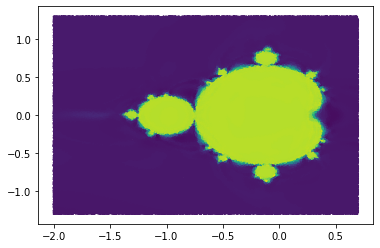

In [72]:
plot = plt.scatter(x, y, s=1, c=predictions)
plt.show()
